<a href="https://colab.research.google.com/github/Mubashra-Muneer/Loan-Approval-Prediction/blob/main/Loan_Approval_Prediction_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Part-1

### Importing all the required libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import shapiro
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib

# Importing the dataset

In [ ]:
loan_df=pd.read_csv("C:\\Users\\itsal\\Downloads\\Loan.csv",index_col=0)

## Information about the dataset

In [ ]:
loan_df.shape

(20000, 35)

In [ ]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, 2018-01-01 to 2072-10-03
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         20000 non-null  int64  
 1   AnnualIncome                20000 non-null  int64  
 2   CreditScore                 20000 non-null  int64  
 3   EmploymentStatus            20000 non-null  object 
 4   EducationLevel              20000 non-null  object 
 5   Experience                  20000 non-null  int64  
 6   LoanAmount                  20000 non-null  int64  
 7   LoanDuration                20000 non-null  int64  
 8   MaritalStatus               20000 non-null  object 
 9   NumberOfDependents          20000 non-null  int64  
 10  HomeOwnershipStatus         20000 non-null  object 
 11  MonthlyDebtPayments         20000 non-null  int64  
 12  CreditCardUtilizationRate   20000 non-null  float64
 13  NumberOfOpenCreditLine

In [ ]:
loan_df.describe()

,Age,AnnualIncome,CreditScore,Experience,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,39.752600,59161.473550,571.612400,17.522750,24882.867800,54.057000,1.517300,454.292700,0.286381,3.023350,...,4891.715521,0.799918,5.002650,7.229432e+04,0.239124,0.239110,911.607052,0.402182,0.239000,50.766780
std,11.622713,40350.845168,50.997358,11.316836,13427.421217,24.664857,1.386325,240.507609,0.159793,1.736161,...,3296.771598,0.120665,2.236804,1.179200e+05,0.035509,0.042205,674.583473,0.338924,0.426483,7.778262
min,18.000000,15000.000000,343.000000,0.000000,3674.000000,12.000000,0.000000,50.000000,0.000974,0.000000,...,1250.000000,0.259203,0.000000,1.000000e+03,0.130101,0.113310,97.030193,0.016043,0.000000,28.800000
25%,32.000000,31679.000000,540.000000,9.000000,15575.000000,36.000000,0.000000,286.000000,0.160794,2.000000,...,2629.583333,0.727379,3.000000,8.734750e+03,0.213889,0.209142,493.763700,0.179693,0.000000,46.000000
50%,40.000000,48566.000000,578.000000,17.000000,21914.500000,48.000000,1.000000,402.000000,0.266673,3.000000,...,4034.750000,0.820962,5.000000,3.285550e+04,0.236157,0.235390,728.511452,0.302711,0.000000,52.000000
75%,48.000000,74391.000000,609.000000,25.000000,30835.000000,72.000000,2.000000,564.000000,0.390634,4.000000,...,6163.000000,0.892333,6.000000,8.882550e+04,0.261533,0.265532,1112.770759,0.509214,0.000000,56.000000
max,80.000000,485341.000000,712.000000,61.000000,184732.000000,120.000000,5.000000,2919.000000,0.917380,13.000000,...,25000.000000,0.999433,16.000000,2.603208e+06,0.405029,0.446787,10892.629520,4.647657,1.000000,84.000000


## Printing the head of the dataset

In [ ]:
loan_df.head()

,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
ApplicationDate,,,,,,,,,,,,,,,,,,,,,
2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,2,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,1,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,2,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,1,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,1,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0


## Data Cleaning

In [ ]:
loan_df.isnull()

,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
ApplicationDate,,,,,,,,,,,,,,,,,,,,,
2018-01-01,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2018-01-02,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2018-01-03,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2018-01-04,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2018-01-05,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2072-09-29,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2072-09-30,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2072-10-01,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### Individually checking for missing values in each column and printing the sum

In [ ]:
null_values = loan_df.isnull().sum()
print(null_values)

Age                           0
AnnualIncome                  0
CreditScore                   0
EmploymentStatus              0
EducationLevel                0
Experience                    0
LoanAmount                    0
LoanDuration                  0
MaritalStatus                 0
NumberOfDependents            0
HomeOwnershipStatus           0
MonthlyDebtPayments           0
CreditCardUtilizationRate     0
NumberOfOpenCreditLines       0
NumberOfCreditInquiries       0
DebtToIncomeRatio             0
BankruptcyHistory             0
LoanPurpose                   0
PreviousLoanDefaults          0
PaymentHistory                0
LengthOfCreditHistory         0
SavingsAccountBalance         0
CheckingAccountBalance        0
TotalAssets                   0
TotalLiabilities              0
MonthlyIncome                 0
UtilityBillsPaymentHistory    0
JobTenure                     0
NetWorth                      0
BaseInterestRate              0
InterestRate                  0
MonthlyL

### Dealing with outliers

In [ ]:
numeric_cols = loan_df.select_dtypes(include=['float64', 'int64'])
Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = (numeric_cols < lower_bound) | (numeric_cols > upper_bound)
cleanLoan_df = loan_df[~(outliers.any(axis=1) & (loan_df["LoanApproved"] != 1))]
cleanLoan_df

,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
ApplicationDate,,,,,,,,,,,,,,,,,,,,,
2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,1,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,1,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,1,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0
2018-01-06,37,178310,626,Self-Employed,Master,16,15433,72,Married,0,...,14859.166667,0.756079,5,27071,0.217433,0.217601,385.577074,0.075211,1,44.0
2018-01-07,58,51250,564,Employed,High School,39,12741,48,Married,0,...,4270.833333,0.884275,5,21730,0.225741,0.205271,391.300352,0.170529,0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2072-09-27,50,30578,588,Employed,Bachelor,29,14654,48,Single,0,...,2548.166667,0.889639,3,3445,0.215654,0.188936,437.333829,0.225391,0,60.0
2072-09-29,44,30180,587,Employed,High School,19,24521,36,Married,3,...,2515.000000,0.826217,1,55327,0.216021,0.195574,905.767712,0.627741,0,55.0
2072-09-30,56,49246,567,Employed,Associate,33,25818,36,Married,5,...,4103.833333,0.816618,3,64002,0.227318,0.199168,958.395633,0.334418,0,54.0


## Data Transformation

### Encoding the categorical variables in the cleaned dataset

In [ ]:
encodedLoan_df=pd.get_dummies(cleanLoan_df)
encodedLoan_df

,Age,AnnualIncome,CreditScore,Experience,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,...,MaritalStatus_Widowed,HomeOwnershipStatus_Mortgage,HomeOwnershipStatus_Other,HomeOwnershipStatus_Own,HomeOwnershipStatus_Rent,LoanPurpose_Auto,LoanPurpose_Debt Consolidation,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other
ApplicationDate,,,,,,,,,,,,,,,,,,,,,
2018-01-02,38,39709,628,15,26045,48,1,496,0.087827,5,...,False,True,False,False,False,False,True,False,False,False
2018-01-04,58,69084,545,34,37898,96,1,755,0.267587,2,...,False,True,False,False,False,False,False,False,True,False
2018-01-05,37,103264,594,17,9184,36,1,274,0.320535,0,...,False,True,False,False,False,False,True,False,False,False
2018-01-06,37,178310,626,16,15433,72,0,732,0.102211,5,...,False,False,False,False,True,False,True,False,False,False
2018-01-07,58,51250,564,39,12741,48,0,337,0.367380,6,...,False,False,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2072-09-27,50,30578,588,29,14654,48,0,137,0.563849,5,...,False,True,False,False,False,True,False,False,False,False
2072-09-29,44,30180,587,19,24521,36,3,673,0.101288,5,...,False,False,False,False,True,True,False,False,False,False
2072-09-30,56,49246,567,33,25818,36,5,414,0.471818,2,...,False,False,False,False,True,False,True,False,False,False


### Finding correlation between the variables

In [ ]:
correlation_matrix = encodedLoan_df.corr()
correlation_matrix

,Age,AnnualIncome,CreditScore,Experience,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,...,MaritalStatus_Widowed,HomeOwnershipStatus_Mortgage,HomeOwnershipStatus_Other,HomeOwnershipStatus_Own,HomeOwnershipStatus_Rent,LoanPurpose_Auto,LoanPurpose_Debt Consolidation,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other
Age,1.000000,0.156769,0.318836,0.982641,0.016469,-0.018331,-0.009308,0.018365,-0.005398,0.000524,...,0.016748,0.000852,-0.001214,-0.013027,0.011246,0.008916,0.000183,0.000531,-0.007402,-0.001560
AnnualIncome,0.156769,1.000000,0.092290,0.158376,0.042357,-0.030054,-0.002739,0.054791,-0.006037,0.006810,...,-0.004305,-0.009918,0.004383,0.007462,0.001266,0.006982,0.000865,0.016783,-0.008510,-0.017633
CreditScore,0.318836,0.092290,1.000000,0.322952,0.011906,0.014072,-0.023294,0.017358,-0.004567,-0.009155,...,0.014160,-0.005570,-0.000946,0.007379,0.000132,0.015695,0.002301,-0.011021,0.004143,-0.017419
Experience,0.982641,0.158376,0.322952,1.000000,0.017805,-0.018637,-0.009449,0.020554,-0.005885,-0.002514,...,0.017430,0.001356,0.000574,-0.015843,0.012008,0.006046,0.001966,0.001906,-0.007271,-0.002115
LoanAmount,0.016469,0.042357,0.011906,0.017805,1.000000,0.055470,-0.004254,0.002525,-0.000672,-0.001066,...,-0.006444,-0.016304,0.011905,0.012298,-0.000986,0.004338,-0.013995,-0.001878,0.006692,0.006294
LoanDuration,-0.018331,-0.030054,0.014072,-0.018637,0.055470,1.000000,-0.001760,-0.001582,-0.002116,-0.004930,...,0.012688,0.001707,0.021396,0.006985,-0.021763,0.016321,0.004037,-0.009156,-0.007003,-0.006028
NumberOfDependents,-0.009308,-0.002739,-0.023294,-0.009449,-0.004254,-0.001760,1.000000,-0.006067,0.009958,0.017276,...,-0.016801,0.001898,0.003561,-0.003626,-0.001169,-0.010839,-0.003647,0.015349,-0.004019,0.007512
MonthlyDebtPayments,0.018365,0.054791,0.017358,0.020554,0.002525,-0.001582,-0.006067,1.000000,-0.001965,-0.004673,...,0.010737,0.011032,-0.000716,-0.004599,-0.007330,-0.006412,0.019363,0.002827,-0.012191,-0.003977
CreditCardUtilizationRate,-0.005398,-0.006037,-0.004567,-0.005885,-0.000672,-0.002116,0.009958,-0.001965,1.000000,0.000374,...,0.007306,0.007283,-0.001449,-0.007447,-0.000357,-0.011213,0.006959,0.012372,-0.001058,-0.008109
NumberOfOpenCreditLines,0.000524,0.006810,-0.009155,-0.002514,-0.001066,-0.004930,0.017276,-0.004673,0.000374,1.000000,...,0.018276,0.006564,0.004738,0.001188,-0.011127,0.002566,0.001868,0.001992,-0.007453,0.002850


## Printing correlation with loan approved

In [ ]:
correlation_matrix["LoanApproved"]

Age                               0.165518
AnnualIncome                      0.615903
CreditScore                       0.139295
Experience                        0.165976
LoanAmount                       -0.226511
LoanDuration                     -0.148149
NumberOfDependents               -0.002914
MonthlyDebtPayments              -0.010275
CreditCardUtilizationRate        -0.000482
NumberOfOpenCreditLines           0.018195
NumberOfCreditInquiries          -0.008241
DebtToIncomeRatio                 0.012967
BankruptcyHistory                 0.121019
PreviousLoanDefaults              0.199818
PaymentHistory                    0.039019
LengthOfCreditHistory             0.120237
SavingsAccountBalance             0.152070
CheckingAccountBalance            0.159524
TotalAssets                       0.265379
TotalLiabilities                  0.104287
MonthlyIncome                     0.620853
UtilityBillsPaymentHistory       -0.022912
JobTenure                         0.031124
NetWorth   

### Getting rid of variables that do not provide valuable insights

In [ ]:
target_corr = correlation_matrix['LoanApproved']
threshold = 0.3
high_corr_vars = target_corr[abs(target_corr) >= threshold].index
df_filtered = encodedLoan_df[high_corr_vars]
df_filtered

,AnnualIncome,MonthlyIncome,InterestRate,TotalDebtToIncomeRatio,LoanApproved,RiskScore
ApplicationDate,,,,,,
2018-01-02,39709,3309.083333,0.201077,0.389852,0,52.0
2018-01-04,69084,5757.000000,0.300911,0.313098,0,54.0
2018-01-05,103264,8605.333333,0.175990,0.070210,1,36.0
2018-01-06,178310,14859.166667,0.217601,0.075211,1,44.0
2018-01-07,51250,4270.833333,0.205271,0.170529,0,50.0
...,...,...,...,...,...,...
2072-09-27,30578,2548.166667,0.188936,0.225391,0,60.0
2072-09-29,30180,2515.000000,0.195574,0.627741,0,55.0
2072-09-30,49246,4103.833333,0.199168,0.334418,0,54.0


## Data Visualization

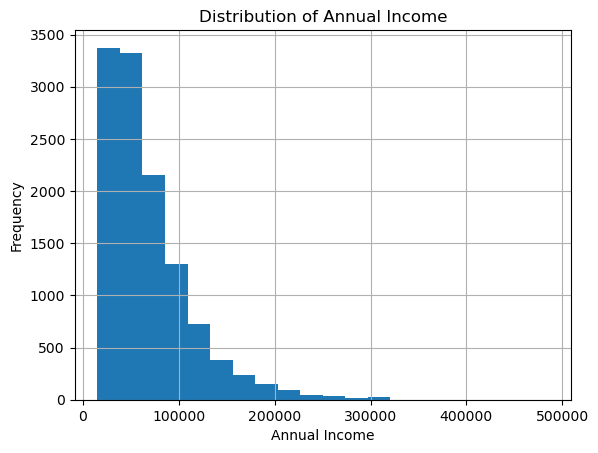

In [ ]:
df_filtered['AnnualIncome'].hist(bins=20)
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.show()

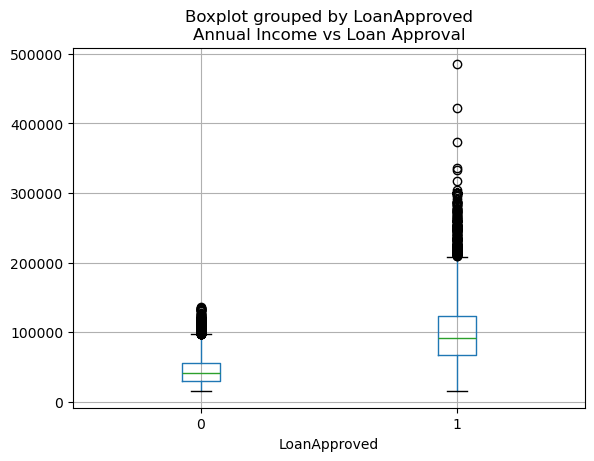

In [ ]:
df_filtered.boxplot(column='AnnualIncome', by='LoanApproved')
plt.title('Annual Income vs Loan Approval')
plt.show()

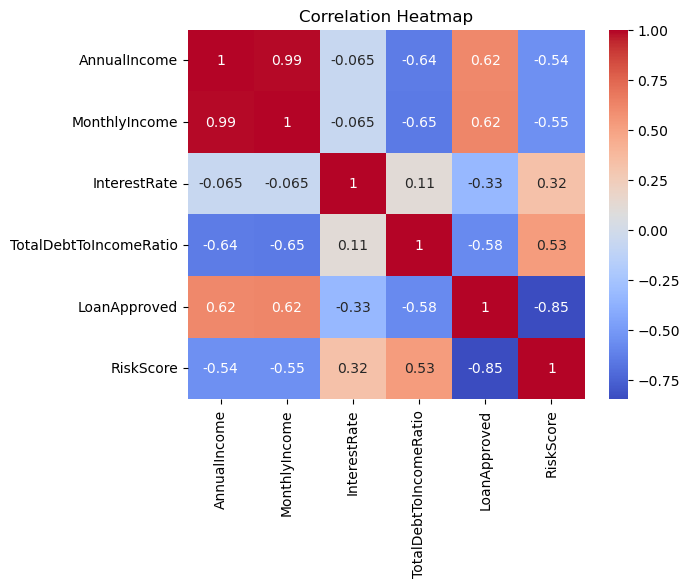

In [ ]:
corr_matrix = df_filtered.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

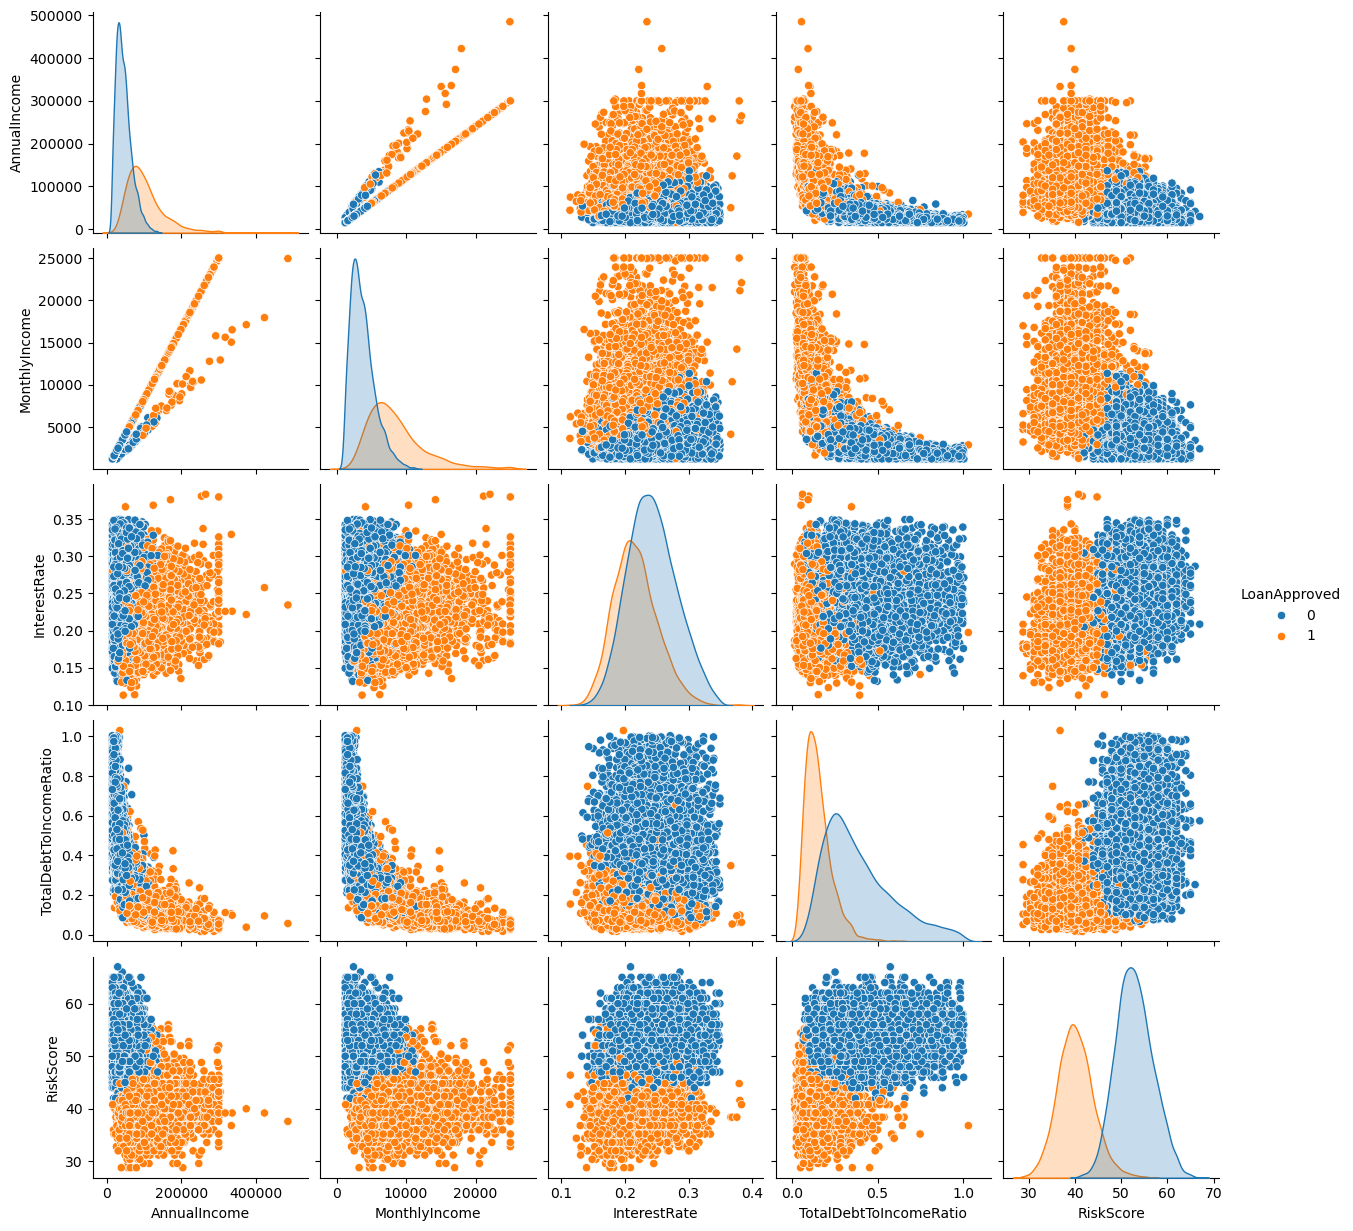

In [ ]:
sns.pairplot(df_filtered, hue='LoanApproved')
plt.show()

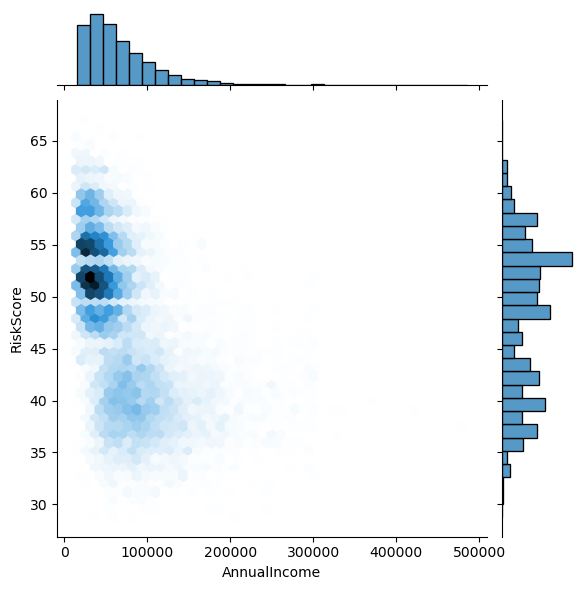

In [ ]:
sns.jointplot(data=df_filtered, x="AnnualIncome", y="RiskScore", kind="hex", marginal_kws=dict(bins=30, fill=True))
plt.show()

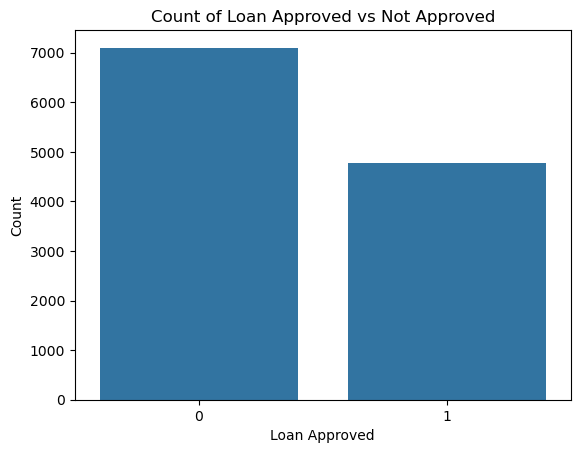

In [ ]:
sns.countplot(data=df_filtered, x="LoanApproved")
plt.xlabel("Loan Approved")
plt.ylabel("Count")
plt.title("Count of Loan Approved vs Not Approved")
plt.show()

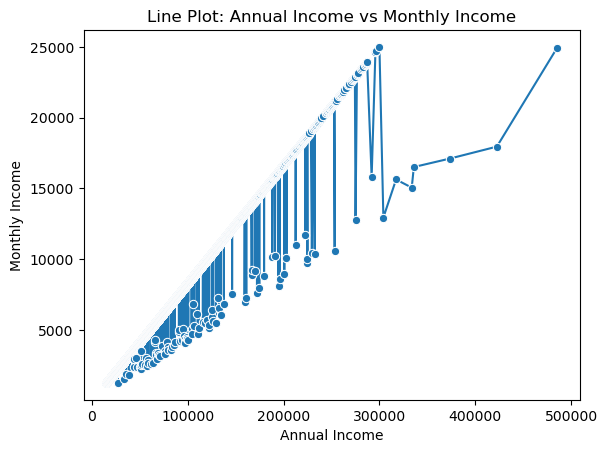

In [ ]:
sns.lineplot(x='AnnualIncome', y='MonthlyIncome', data=df_filtered, marker='o')
plt.title('Line Plot: Annual Income vs Monthly Income')
plt.xlabel('Annual Income')
plt.ylabel('Monthly Income')
plt.show()

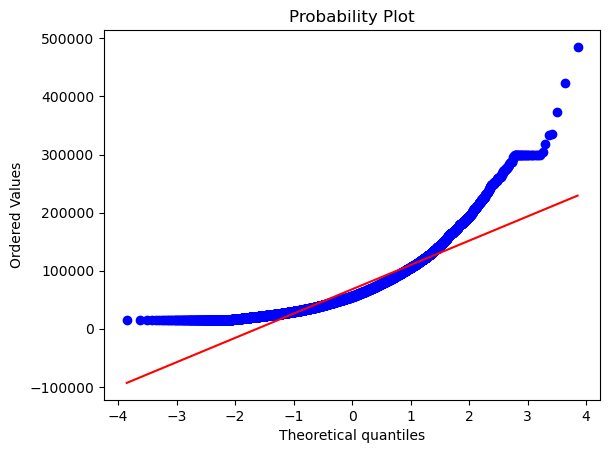

In [ ]:
stats.probplot(df_filtered['AnnualIncome'], dist="norm", plot=plt)
plt.show()

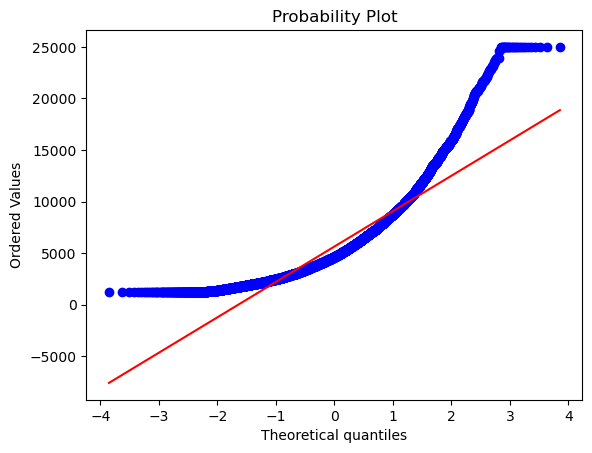

In [ ]:
stats.probplot(df_filtered['MonthlyIncome'], dist="norm", plot=plt)
plt.show()

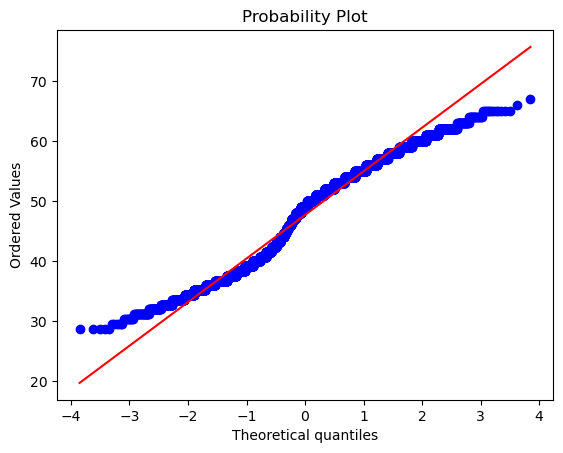

In [ ]:
stats.probplot(df_filtered['RiskScore'], dist="norm", plot=plt)
plt.show()

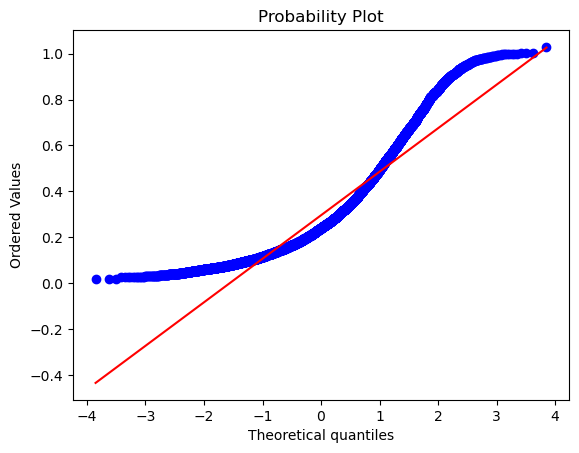

In [ ]:



stats.probplot(df_filtered['TotalDebtToIncomeRatio'], dist="norm", plot=plt)
plt.show()

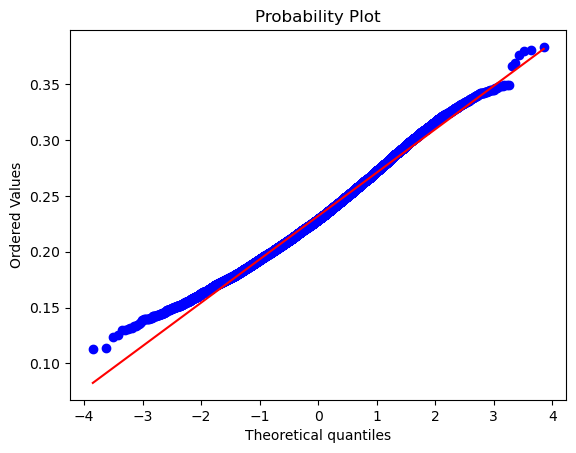

In [ ]:
stats.probplot(df_filtered['InterestRate'], dist="norm", plot=plt)
plt.show()

## Scaling of variables

In [ ]:
columns_to_scale = df_filtered.columns.difference(['LoanApproved'])
scaler = MinMaxScaler()
df_filtered.loc[:, columns_to_scale] = scaler.fit_transform(df_filtered[columns_to_scale])
df_filtered

C:\Users\itsal\AppData\Local\Temp\ipykernel_29672\3582184627.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.05253423 0.11498891 0.18765959 ... 0.072811   0.07219868 0.08127507]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_filtered.loc[:, columns_to_scale] = scaler.fit_transform(df_filtered[columns_to_scale])


,AnnualIncome,MonthlyIncome,InterestRate,TotalDebtToIncomeRatio,LoanApproved,RiskScore
ApplicationDate,,,,,,
2018-01-02,0.052534,0.086698,0.324967,0.368928,0,0.607330
2018-01-04,0.114989,0.189768,0.694611,0.293176,0,0.659686
2018-01-05,0.187660,0.309698,0.232081,0.053459,1,0.188482
2018-01-06,0.347216,0.573018,0.386149,0.058395,1,0.397906
2018-01-07,0.077072,0.127193,0.340495,0.152468,0,0.554974
...,...,...,...,...,...,...
2072-09-27,0.033121,0.054660,0.280013,0.206614,0,0.816754
2072-09-29,0.032274,0.053263,0.304591,0.603710,0,0.685864
2072-09-30,0.072811,0.120161,0.317900,0.314217,0,0.659686


## Information about the new dataset

In [ ]:
df_filtered.head()

,AnnualIncome,MonthlyIncome,InterestRate,TotalDebtToIncomeRatio,LoanApproved,RiskScore
ApplicationDate,,,,,,
2018-01-02,0.052534,0.086698,0.324967,0.368928,0,0.607330
2018-01-04,0.114989,0.189768,0.694611,0.293176,0,0.659686
2018-01-05,0.187660,0.309698,0.232081,0.053459,1,0.188482
2018-01-06,0.347216,0.573018,0.386149,0.058395,1,0.397906
2018-01-07,0.077072,0.127193,0.340495,0.152468,0,0.554974


In [ ]:
df_filtered.shape

(11879, 6)

In [ ]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11879 entries, 2018-01-02 to 2072-10-03
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   AnnualIncome            11879 non-null  float64
 1   MonthlyIncome           11879 non-null  float64
 2   InterestRate            11879 non-null  float64
 3   TotalDebtToIncomeRatio  11879 non-null  float64
 4   LoanApproved            11879 non-null  int64  
 5   RiskScore               11879 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 907.7+ KB


In [ ]:
df_filtered.describe()

,AnnualIncome,MonthlyIncome,InterestRate,TotalDebtToIncomeRatio,LoanApproved,RiskScore
count,11879.000000,11879.000000,11879.000000,11879.000000,11879.000000,11879.000000
mean,0.112771,0.184411,0.439806,0.275997,0.402391,0.495688
std,0.096795,0.156697,0.144223,0.198425,0.490401,0.193125
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.044655,0.073323,0.336030,0.127800,0.000000,0.314136
50%,0.086452,0.141916,0.428523,0.220787,0.000000,0.528796
75%,0.151498,0.248440,0.534839,0.372330,1.000000,0.649215
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Making a .csv file of the dataset

In [ ]:
df_filtered.to_csv('Loan Part1')

## Coorelation of the variables that are left

In [ ]:
df_filtered.corr()

,AnnualIncome,MonthlyIncome,InterestRate,TotalDebtToIncomeRatio,LoanApproved,RiskScore
AnnualIncome,1.000000,0.990333,-0.065172,-0.640743,0.615903,-0.544603
MonthlyIncome,0.990333,1.000000,-0.065376,-0.647263,0.620853,-0.547865
InterestRate,-0.065172,-0.065376,1.000000,0.111025,-0.330744,0.324903
TotalDebtToIncomeRatio,-0.640743,-0.647263,0.111025,1.000000,-0.578378,0.526986
LoanApproved,0.615903,0.620853,-0.330744,-0.578378,1.000000,-0.845580
RiskScore,-0.544603,-0.547865,0.324903,0.526986,-0.845580,1.000000


## Slicing the data-frame

In [ ]:
Loan_approved=df_filtered[df_filtered['LoanApproved']==1]
Loan_approved

,AnnualIncome,MonthlyIncome,InterestRate,TotalDebtToIncomeRatio,LoanApproved,RiskScore
ApplicationDate,,,,,,
2018-01-05,0.187660,0.309698,0.232081,0.053459,1,0.188482
2018-01-06,0.347216,0.573018,0.386149,0.058395,1,0.397906
2018-01-08,0.175075,0.288930,0.354721,0.241528,1,0.356021
2018-01-16,0.088553,0.146140,0.381749,0.154936,1,0.125654
2018-01-18,0.270710,0.446758,0.409082,0.073636,1,0.272251
...,...,...,...,...,...,...
2072-09-17,0.097912,0.161586,0.118148,0.128124,1,0.209424
2072-09-21,0.132761,0.219098,0.495132,0.082685,1,0.335079
2072-09-22,0.281394,0.464389,0.414038,0.054130,1,0.314136


In [ ]:
Loan_not_approved = df_filtered[df_filtered['LoanApproved'] == 0]
Loan_not_approved

,AnnualIncome,MonthlyIncome,InterestRate,TotalDebtToIncomeRatio,LoanApproved,RiskScore
ApplicationDate,,,,,,
2018-01-02,0.052534,0.086698,0.324967,0.368928,0,0.607330
2018-01-04,0.114989,0.189768,0.694611,0.293176,0,0.659686
2018-01-07,0.077072,0.127193,0.340495,0.152468,0,0.554974
2018-01-13,0.126404,0.208607,0.527156,0.101487,0,0.712042
2018-01-17,0.074503,0.122954,0.273325,0.261678,0,0.633508
...,...,...,...,...,...,...
2072-09-27,0.033121,0.054660,0.280013,0.206614,0,0.816754
2072-09-29,0.032274,0.053263,0.304591,0.603710,0,0.685864
2072-09-30,0.072811,0.120161,0.317900,0.314217,0,0.659686


In [ ]:
len_approved=len(Loan_approved)
print(len_approved)

4780


In [ ]:
len_notapproved=len(Loan_not_approved)
print(len_notapproved)

7099


## Splitting data-frame for training and testing

In [ ]:
training_approved = Loan_approved.head(int(0.70 * len_approved))
training_not_approved = Loan_not_approved.head(int(0.70 * len_notapproved))
training = pd.concat([training_approved, training_not_approved])
training

,AnnualIncome,MonthlyIncome,InterestRate,TotalDebtToIncomeRatio,LoanApproved,RiskScore
ApplicationDate,,,,,,
2018-01-05,0.187660,0.309698,0.232081,0.053459,1,0.188482
2018-01-06,0.347216,0.573018,0.386149,0.058395,1,0.397906
2018-01-08,0.175075,0.288930,0.354721,0.241528,1,0.356021
2018-01-16,0.088553,0.146140,0.381749,0.154936,1,0.125654
2018-01-18,0.270710,0.446758,0.409082,0.073636,1,0.272251
...,...,...,...,...,...,...
2056-06-09,0.107811,0.177923,0.432924,0.131257,0,0.764398
2056-06-12,0.089688,0.148014,0.334953,0.245461,0,0.450262
2056-06-15,0.040836,0.067393,0.552753,0.459487,0,0.633508


In [ ]:
testing_approved = Loan_approved.tail(int(0.30 * len_approved))
testing_not_approved = Loan_not_approved.tail(int(0.30 * len_notapproved))
testing = pd.concat([testing_approved, testing_not_approved])
testing

,AnnualIncome,MonthlyIncome,InterestRate,TotalDebtToIncomeRatio,LoanApproved,RiskScore
ApplicationDate,,,,,,
2055-11-08,0.140658,0.232130,0.433723,0.146027,1,0.188482
2055-11-14,0.605943,1.000000,0.473059,0.012380,1,0.272251
2055-11-17,0.311072,0.513368,0.472008,0.029316,1,0.376963
2055-11-18,0.113775,0.187765,0.222923,0.079879,1,0.230366
2055-11-20,0.178288,0.294232,0.515791,0.054987,1,0.376963
...,...,...,...,...,...,...
2072-09-27,0.033121,0.054660,0.280013,0.206614,0,0.816754
2072-09-29,0.032274,0.053263,0.304591,0.603710,0,0.685864
2072-09-30,0.072811,0.120161,0.317900,0.314217,0,0.659686


In [ ]:
X_train = training.drop(columns=["LoanApproved"])
y_train = training["LoanApproved"]

X_test = testing.drop(columns=["LoanApproved"])
y_test = testing["LoanApproved"]

## Integrating machine learning models with Forward Feature Selection

### Models selected for classification
### .Logistic Regression
### .Random Forest
### .K-Nearest Neighbors

In [ ]:
selected_features = {
    'Logistic Regression': [],
    'Random Forest': [],
    'K-Nearest Neighbors': []
}
best_scores = {
    'Logistic Regression': 0,
    'Random Forest': 0,
    'K-Nearest Neighbors': 0
}

remaining_features = list(X_train.columns)

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=3)
}

for model_name, model in models.items():
    print("Feature Selection for ",model_name," :")
    remaining_features_model = remaining_features[:]

    while remaining_features_model:
        scores = []
        for feature in remaining_features_model:
            features_to_test = selected_features[model_name] + [feature]
            model.fit(X_train[features_to_test], y_train)
            y_pred = model.predict(X_test[features_to_test])
            scores.append((feature, accuracy_score(y_test, y_pred)))

        best_feature, score = max(scores, key=lambda x: x[1])
        if score > best_scores[model_name]:
            best_scores[model_name] = score
            selected_features[model_name].append(best_feature)
            remaining_features_model.remove(best_feature)
            print("Added feature: ",best_feature, "Accuracy: ",round(score, 4))
        else:
            remaining_features_model.remove(best_feature)
            print("Skipped feature: ",best_feature, "Accuracy did not improve.")

    print("\nSelected Features for ",model_name,":" ,selected_features[model_name],"\n")


Feature Selection for  Logistic Regression  :
Added feature:  RiskScore Accuracy:  0.9604
Added feature:  AnnualIncome Accuracy:  0.9691
Added feature:  InterestRate Accuracy:  0.9702
Added feature:  TotalDebtToIncomeRatio Accuracy:  0.9767
Added feature:  MonthlyIncome Accuracy:  0.9775

Selected Features for  Logistic Regression : ['RiskScore', 'AnnualIncome', 'InterestRate', 'TotalDebtToIncomeRatio', 'MonthlyIncome'] 

Feature Selection for  Random Forest  :
Added feature:  RiskScore Accuracy:  0.9919
Skipped feature:  TotalDebtToIncomeRatio Accuracy did not improve.
Skipped feature:  MonthlyIncome Accuracy did not improve.
Skipped feature:  AnnualIncome Accuracy did not improve.
Skipped feature:  InterestRate Accuracy did not improve.

Selected Features for  Random Forest : ['RiskScore'] 

Feature Selection for  K-Nearest Neighbors  :
Added feature:  RiskScore Accuracy:  0.8987
Added feature:  AnnualIncome Accuracy:  0.9815
Skipped feature:  MonthlyIncome Accuracy did not improve.


## Classification report for models

In [ ]:
best_model_name = None
best_model_score = 0
best_model_features = None
best_model = None
best_model_classification_report = None

for model_name, model in models.items():
    print("Classification Report for ",model_name," :")
    best_features = selected_features[model_name]
    model.fit(X_train[best_features], y_train)
    y_pred = model.predict(X_test[best_features])
    score = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    print(classification_rep)
    print("Accuracy for ", model_name," :", round(score, 4),"\n")


    if score > best_model_score:
        best_model_score = score
        best_model_name = model_name
        best_model_features = best_features
        best_model = model
        best_model_classification_report = classification_rep


Classification Report for  Logistic Regression  :
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2129
           1       0.98      0.97      0.97      1434

    accuracy                           0.98      3563
   macro avg       0.98      0.98      0.98      3563
weighted avg       0.98      0.98      0.98      3563

Accuracy for  Logistic Regression  : 0.9775 

Classification Report for  Random Forest  :
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2129
           1       0.99      0.99      0.99      1434

    accuracy                           0.99      3563
   macro avg       0.99      0.99      0.99      3563
weighted avg       0.99      0.99      0.99      3563

Accuracy for  Random Forest  : 0.9919 

Classification Report for  K-Nearest Neighbors  :
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2129
       

### Comparing models accuracy using barplot


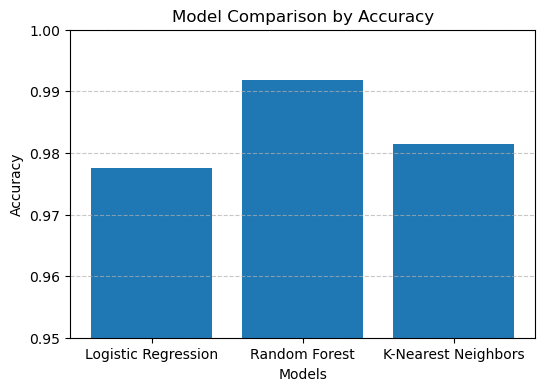

In [ ]:
model_names = list(best_scores.keys())
model_accuracies = list(best_scores.values())
selected_features_count = []
for features in selected_features.values():
    selected_features_count.append(len(features))

plt.figure(figsize=(6, 4))
plt.bar(model_names, model_accuracies)
plt.title('Model Comparison by Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Models')
plt.ylim(0.95, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Comapring number of features used by each model to get best results

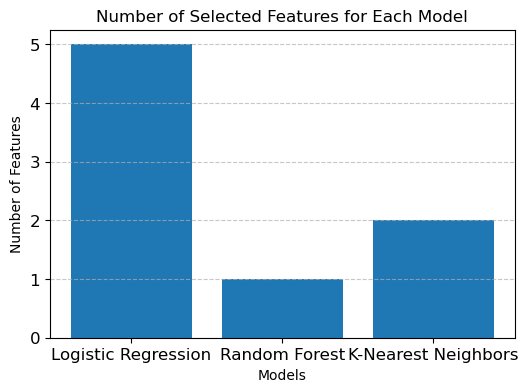

In [ ]:
plt.figure(figsize=(6, 4))
plt.bar(model_names, selected_features_count)
plt.title('Number of Selected Features for Each Model')
plt.ylabel('Number of Features')
plt.xlabel('Models')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### Saving the best model

In [ ]:
loan_prediction_model = best_model
loan_prediction_model.fit(X_train[best_model_features], y_train)
joblib.dump(loan_prediction_model, "loan_prediction_model.pkl")
print("\nThe Loan Prediction Model has been trained and saved as 'loan_prediction_model.pkl'.")


The Loan Prediction Model has been trained and saved as 'loan_prediction_model.pkl'.


### Details about the best model

In [ ]:
print("=== Best Model Details ===")
print("Best Model: ", best_model_name)
print("Accuracy: ",round(best_model_score, 4))
print("Selected Features: ",best_model_features)
print("Classification Report:\n",best_model_classification_report)

=== Best Model Details ===
Best Model:  Random Forest
Accuracy:  0.9919
Selected Features:  ['RiskScore']
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2129
           1       0.99      0.99      0.99      1434

    accuracy                           0.99      3563
   macro avg       0.99      0.99      0.99      3563
weighted avg       0.99      0.99      0.99      3563

